# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Linear Regression using the Normal Equation

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

In [3]:
X.shape, y.shape

((100, 1), (100, 1))

Text(0, 0.5, '$y$')

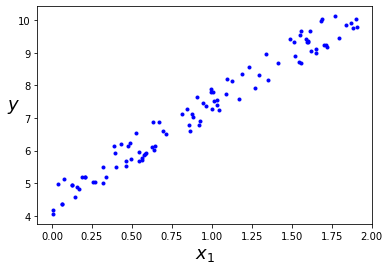

In [4]:
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)

In [5]:
X_b  = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[4.42840606],
       [3.0142563 ]])

In [7]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [8]:
X_new_b = np.c_[np.ones((2,1)), X_new]

In [9]:
y_predict = X_new_b.dot(theta_best)

[0, 2, 0, 15]

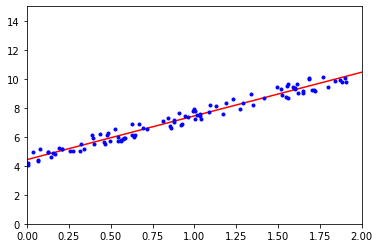

In [10]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])

# Linear Regression using sklearn

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.42840606]), array([[3.0142563]]))

In [13]:
y_predict_sklearn = lin_reg.predict(X_new)

[0, 2, 0, 15]

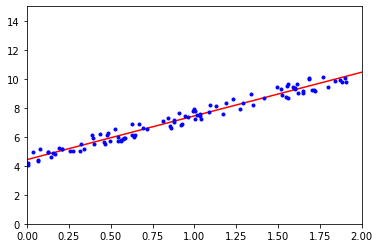

In [14]:
plt.plot(X_new, y_predict_sklearn, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])

# Linear Regression using Batch Gradient Descent

In [15]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [16]:
theta

array([[4.42840606],
       [3.0142563 ]])

In [17]:
X_new_b.dot(theta)

array([[ 4.42840606],
       [10.45691866]])

In [18]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, 'b.')
    n_interations = 1000
    
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if iteration > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0,2,0,15])
    plt.title(r"$\eta$ = {}".format(eta), fontsize=16)

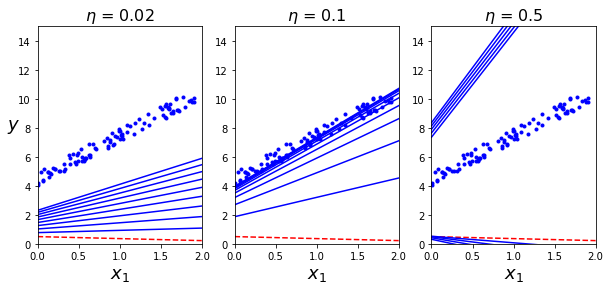

In [19]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132)
plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta, eta=0.5)

In [20]:
#theta_path_bgd # It seems like python will automatically modify the parameter you passed into a function

# Linear Regression using Stochastic Gradient Descent

In [21]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

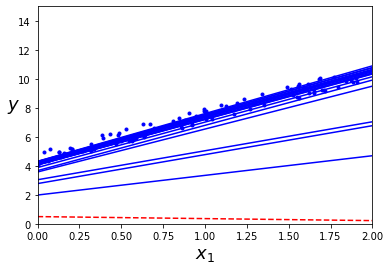

In [22]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if i > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
        
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [23]:
# Use SGD regressor from sklearn
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)

sgd_reg.fit(X, y.ravel()) # Here ravel turns y into a 1-d array

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [24]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.39906431]), array([3.01262683]))

# Polynomial Regression

In [25]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
np.random.seed(42)

In [27]:
m = 100
X = 6*np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

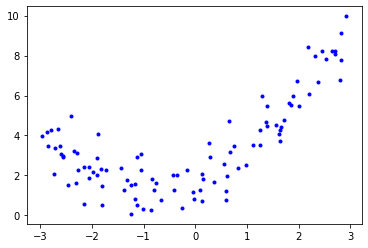

In [28]:
plt.plot(X, y, 'b.')
plt.show()

In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)

In [30]:
X[0], X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [31]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

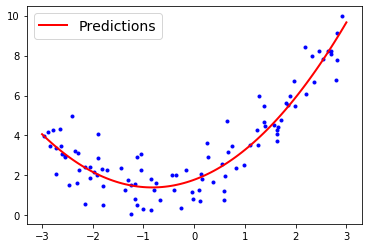

In [32]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.fit_transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.legend(loc='upper left', fontsize=14)

In [33]:
from sklearn.pipeline import Pipeline

In [34]:
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)

[0, 80, 0, 3]

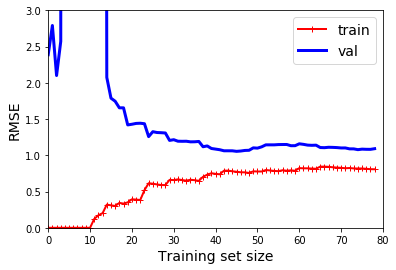

In [36]:
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0,80,0,3])

# Regularized Linear Models

## Ridge Regression

In [37]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
np.random.seed(42)

m = 20
X = 3*np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

X_new = np.linspace(0, 3, 100).reshape(100,1)

In [39]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42) # use closed-form solution for Ridge regression
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [40]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42) # use Stochastic Gradient descent for Ridge regression
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

In [41]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

## LASSO Regression

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
np.random.seed(42)

m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

X_new = np.linspace(0, 3, 100).reshape(100,1)

In [44]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [45]:
lasso_pred = lasso_reg.predict(X_new)

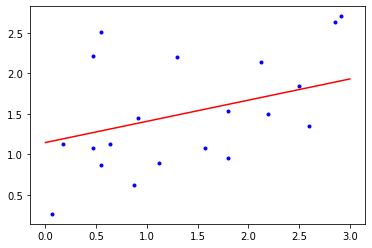

In [46]:
plt.plot(X, y, 'b.')
plt.plot(X_new, lasso_pred, 'r-')

## Elastic Net
- The middle ground between Ridge Regression and LASSO Regression.
- The regularization term is simply the mixture of that of Ridge and LASSO, controled by the mix rate r.

In [47]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42) # l1_ratio corresponds to the mix rate r
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## Early Stopping
- Another way to regularize iterative learning algorithms.
- Stop training as soon as **validation error** reaches a minimum.

In [48]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X ** 2 + np.random.randn(m,1)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [50]:
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [51]:
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

In [52]:
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

In [53]:
from sklearn.base import clone
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [54]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

In [55]:
minimum_val_error = float("inf")
best_epoche = None
best_model = None

for epoche in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_pred = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_pred)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoche = epoche
        best_model = clone(sgd_reg)

In [56]:
best_epoche

443

In [57]:
best_model

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=True)

# Logistic Regression

In [58]:
from sklearn import datasets

In [59]:
iris = datasets.load_iris()

In [60]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [61]:
X = iris['data'][:,3:]
y = (iris['target'] == 2).astype(np.int)

In [62]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_pred_proba = log_reg.predict_proba(X_new)

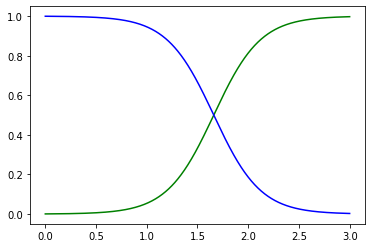

In [64]:
plt.plot(X_new, y_pred_proba[:, 1], 'g-', label="Iris-Virginica")
plt.plot(X_new, y_pred_proba[:, 0], 'b-', label="Not Iris-Virginica")

In [65]:
X2 = iris['data']
log_reg2 = LogisticRegression()
log_reg2.fit(X2, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
X_new2 = [[7, 2, 6, 2]]
log_reg2.predict_proba(X_new2)

array([[0.014768, 0.985232]])

# Softmax Regression

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
from sklearn import datasets

iris = datasets.load_iris()

In [69]:
X = iris['data'][:, (2,3)]
y = iris['target']

In [70]:
from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
softmax_reg.predict_proba([[5,2]]), softmax_reg.predict([[5,2]])

(array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]]), array([2]))

# Exercises

## 12. Batch Gradient Descent with early stopping for Softmax Regression

In [72]:
X = iris["data"][:, (2,3)]
y = iris['target']

In [73]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [74]:
np.random.seed(2042)

In [75]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]

X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]

X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

- The targets are currently class indices (0, 1 or 2), but we need target class probabilities to train the Softmax Regression model. 
- Each instance will have target class probabilities equal to 0.0 for all classes except for the target class which will have a probability of 1.0 (in other words, the vector of class probabilities for ay given instance is a one-hot vector). 
- Let's write a small function to convert the vector of class indices into a matrix containing a one-hot vector.

In [76]:
def to_one_hot(y):
    n_class = y.max() + 1
    m = len(y)
    y_one_hot = np.zeros((m, n_class))
    y_one_hot[np.arange(m), y] = 1
    return y_one_hot

In [77]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [78]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [79]:
y_train_one_hot = to_one_hot(y_train)
y_valid_one_hot = to_one_hot(y_valid)
y_test = to_one_hot(y_test)

- Define the Softmax function.

In [80]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [81]:
n_inputs = X_train.shape[1]
n_outputs = len(np.unique(y_train))

- Cost function:
$J(\mathbf{\Theta}) =
\dfrac{1}{m} \sum\limits_{i=1}^{m} \sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$
- The equation for the gradients:
$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$
- Note that $\log\left(\hat{p}_k^{(i)}\right)$ may not be computable if $\hat{p}_k^{(i)} = 0$. So we will add a tiny value $\epsilon$ to $\log\left(\hat{p}_k^{(i)}\right)$ to avoid getting nan values.

In [82]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    y_proba = softmax(logits)
    loss = -np.mean(np.sum(y_train_one_hot * np.log(y_proba + epsilon), axis=1))
    error = y_proba - y_train_one_hot
    
    if iteration % 500 == 0:
        print(iteration, loss)
    
    gradients = 1/m * X_train.T.dot(error) # vector of partial derivatives
    Theta = Theta - eta * gradients # Next (better) set of parameters

0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693313
2000 0.5444496861981873
2500 0.5038530181431525
3000 0.4729228972192248
3500 0.4482424418895776
4000 0.4278651093928793
4500 0.41060071429187134
5000 0.3956780375390374


- Now, the model has been trained.
- Theta is the parameters of the Softmax model.

In [83]:
Theta

array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

- Let's try to make predictions using the model trained.

In [84]:
logits = X_valid.dot(Theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

- For the sake of the exercise, let's add a bit of l2 regularization.
- So that the loss function now has a l2 penalty, and the gradients have the proper additional term.
    - Note that we don't regularize the first element of Theta since this corresponds to the bias term.

In [85]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1   # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(y_train_one_hot * np.log(y_proba + epsilon), axis = 1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = y_proba - y_train_one_hot
    
    if iteration % 500 == 0:
        print(iteration, loss)
        
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 6.629842469083912
500 0.5339667976629505
1000 0.503640075014894
1500 0.49468910594603216
2000 0.4912968418075477
2500 0.489899247009333
3000 0.48929905984511984
3500 0.48903512443978603
4000 0.4889173621830818
4500 0.4888643337449303
5000 0.4888403120738818


In [86]:
logits = X_valid.dot(Theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

- Add early stopping.

In [87]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logit = X_train.dot(Theta)
    y_proba = softmax(logit)
    xentropy_loss = -np.mean(np.sum(y_train_one_hot * np.log(y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = y_proba - y_train_one_hot
    
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients
    
    logits = X_valid.dot(Theta)
    y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(y_valid_one_hot * np.log(y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    
    if iteration % 500 == 0:
        print(iteration, loss)
        
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 4.7096017363419875
500 0.5739711987633519
1000 0.5435638529109127
1500 0.5355752782580262
2000 0.5331959249285544
2500 0.5325946767399383
2765 0.5325460966791898
2766 0.5325460971327977 early stopping!


In [88]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

- Now, let's plot the model's predictions on the whole dataset.

[0, 7, 0, 3.5]

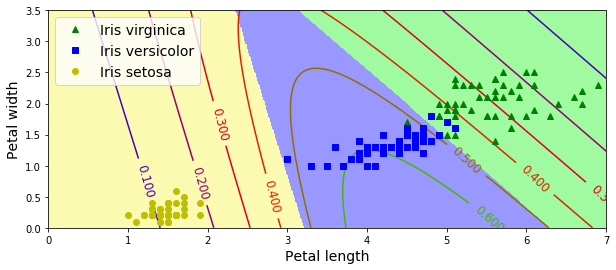

In [89]:
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1)
)

X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], 'g^', label='Iris virginica')
plt.plot(X[y==1, 0], X[y==1, 1], 'bs', label='Iris versicolor')
plt.plot(X[y==0, 0], X[y==0, 1], 'yo', label='Iris setosa')

from matplotlib.colors import ListedColormap
custom_map = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_map)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

- Measure the final model's accuracy on the test set.

In [90]:
logits = X_test.dot(Theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

accuracy_score = np.mean(y_predict == np.argmax(y_test, axis=1))
accuracy_score

0.9333333333333333